In [10]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import cv2

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Watertight Test

In [ ]:
# checking if pix3d is watertight
def as_mesh(scene_or_mesh):
    """
    Convert a possible scene to a mesh.

    If conversion occurs, the returned mesh has only vertex and face data.
    """
    if isinstance(scene_or_mesh, trimesh.Scene):
        if len(scene_or_mesh.geometry) == 0:
            mesh = None  # empty scene
        else:
            # we lose texture information here
            mesh = trimesh.util.concatenate(
                tuple(trimesh.Trimesh(vertices=g.vertices, faces=g.faces)
                    for g in scene_or_mesh.geometry.values()))
    else:
        assert(isinstance(mesh, trimesh.Trimesh))
        mesh = scene_or_mesh
    return mesh
mesh_path = "../data/pix3d/model/chair/IKEA_BERNHARD/model.obj"
scene = trimesh.load_mesh(mesh_path, file_type='obj')
mesh = as_mesh(scene)
print(mesh.is_watertight)



# Check Pointcloud Alignment

In [101]:
def plot_pointclouds(instance_dir, n_instances=10, n_points_sample = 1000, rotate = False):
    
    instances = []
    for root, dirs, files in os.walk(instance_dir):
        for d in dirs:
            if len(os.path.join(root,d).replace(instance_dir, "").split('/'))==1:
                instances.append(d)
                
    for instance in random.sample(instances, n_instances):
        
        shape_dir = os.path.join(instance_dir, instance)
        pointcloud_path = os.path.join(shape_dir, "pointcloud.npz")
        pointcloud_info = np.load(pointcloud_path)
        pointcloud = pointcloud_info['points']
        print(pointcloud_info['normals'].shape)
        print(pointcloud_info['normals'])
        raise
        if rotate:
            # y-axis ccw by 90 deg
            rot_mat = np.array([[0,0,1],[0,1,0],[-1,0,0]])
            pointcloud = pointcloud @ rot_mat
        pointcloud = pointcloud[np.random.choice(pointcloud.shape[0], n_points_sample)]
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(instance)
        x = pointcloud[:,0]
        y = pointcloud[:,1]
        z = pointcloud[:,2]
        ax.scatter(x,y,z, marker = '.')

In [97]:
def plot_points(instance_dir, n_instances=5, n_points_sample = 50000, rotate = False):
    
    instances = []
    for root, dirs, files in os.walk(instance_dir):
        for d in dirs:
            if len(os.path.join(root,d).replace(instance_dir, "").split('/'))==1:
                instances.append(d)
                
    for instance in random.sample(instances, n_instances):
        
        shape_dir = os.path.join(instance_dir, instance)
        pointcloud_path = os.path.join(shape_dir, "points.npz")
        pointcloud_info = np.load(pointcloud_path)
        #print(pointcloud_info['points'].shape)
        #print(np.unpackbits(pointcloud_info['occupancies']).shape)
        
        pointcloud = pointcloud_info['points']
        pointcloud[:,0] *= np.unpackbits(pointcloud_info['occupancies'])
        pointcloud[:,1] *= np.unpackbits(pointcloud_info['occupancies'])
        pointcloud[:,2] *= np.unpackbits(pointcloud_info['occupancies'])
        
        if rotate:
            # y-axis ccw by 90 deg
            rot_mat = np.array([[0,0,1],[0,1,0],[-1,0,0]])
            pointcloud = pointcloud @ rot_mat
        pointcloud = pointcloud[np.random.choice(pointcloud.shape[0], n_points_sample)]
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(instance)
        x = pointcloud[:,0]
        y = pointcloud[:,1]
        z = pointcloud[:,2]
        ax.scatter(x,y,z, marker = '.')

In [102]:
plot_points("../data/pix3d_processed/chair/", rotate=True)
#plot_points("../data/ShapeNet/03001627/", rotate=True)


KeyboardInterrupt: 

In [103]:
plot_pointclouds("../data/ShapeNet/03001627/")

(100000, 3)
[[-0.984   -0.1372   0.11304]
 [-0.8525   0.343   -0.3945 ]
 [-0.04276 -0.00571  0.999  ]
 ...
 [ 0.00867 -0.1666  -0.986  ]
 [-0.9746  -0.0661  -0.2148 ]
 [ 0.01614 -0.04306  0.999  ]]


RuntimeError: No active exception to reraise

<IPython.core.display.Javascript object>


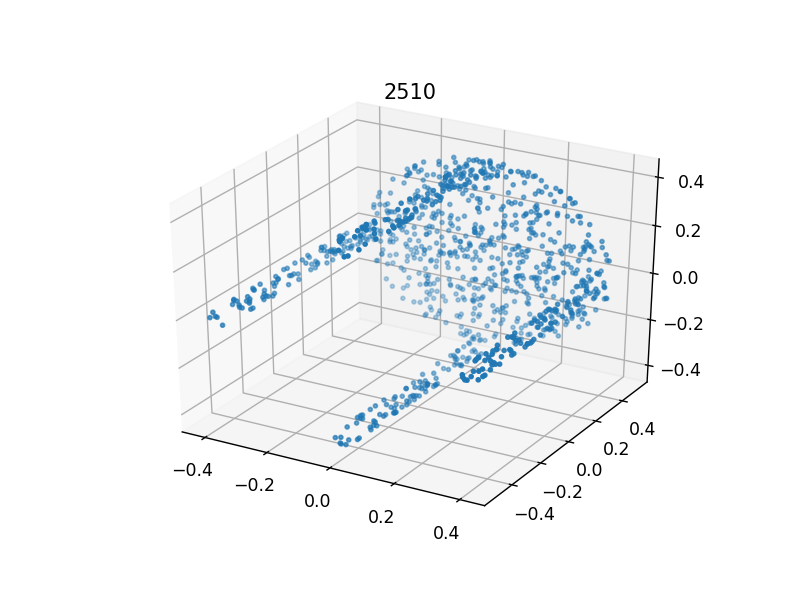

<IPython.core.display.Javascript object>


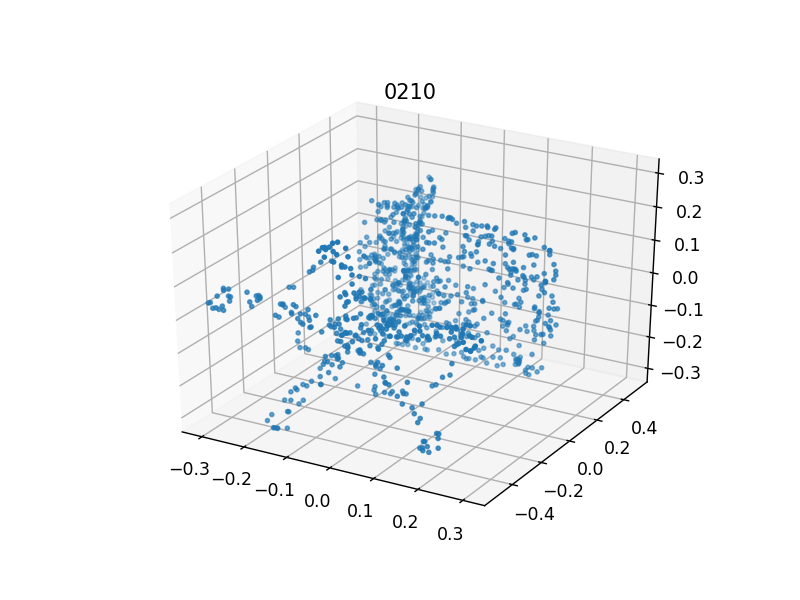

<IPython.core.display.Javascript object>


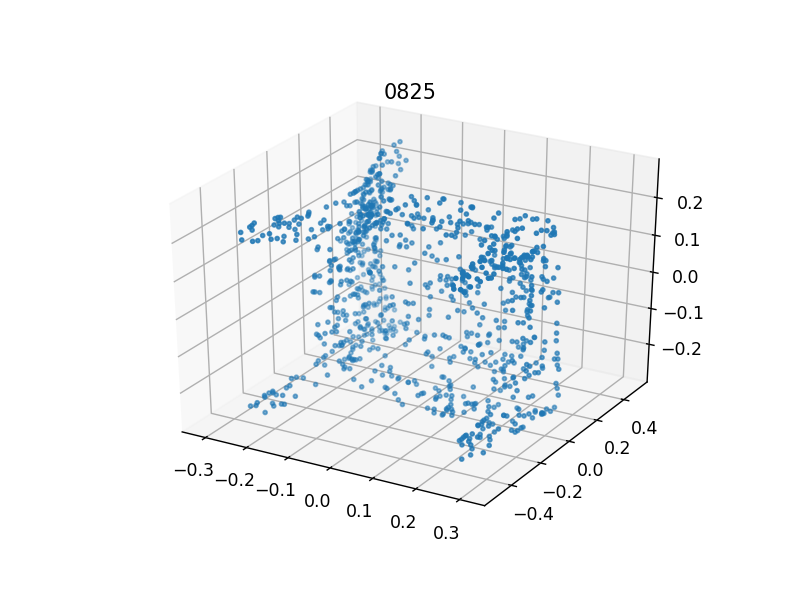

<IPython.core.display.Javascript object>


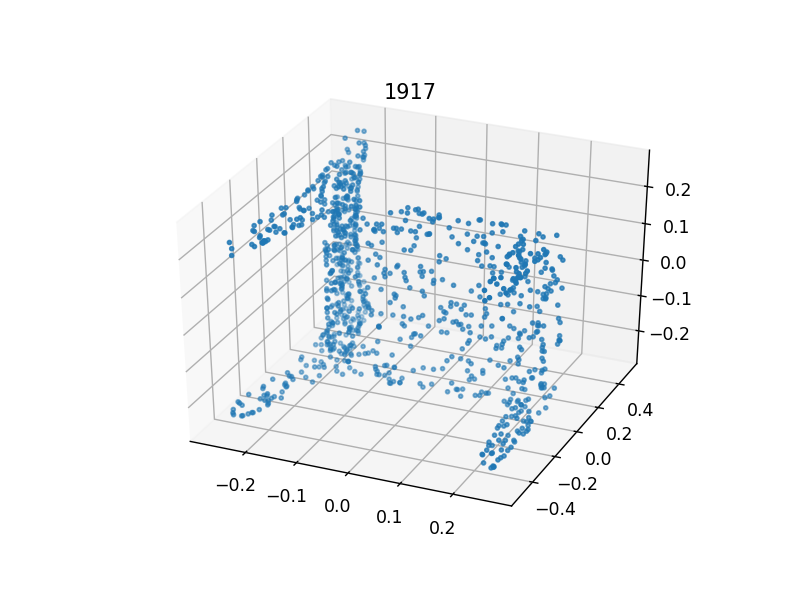

<IPython.core.display.Javascript object>


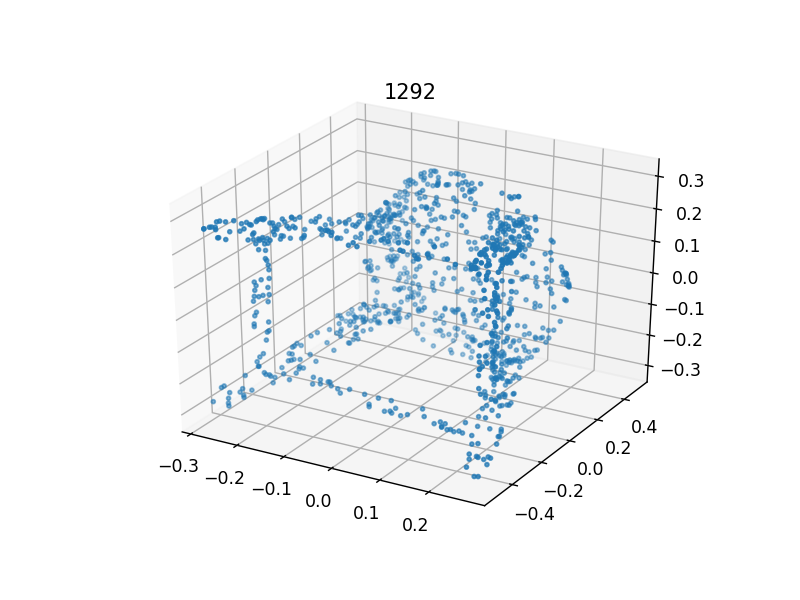

<IPython.core.display.Javascript object>


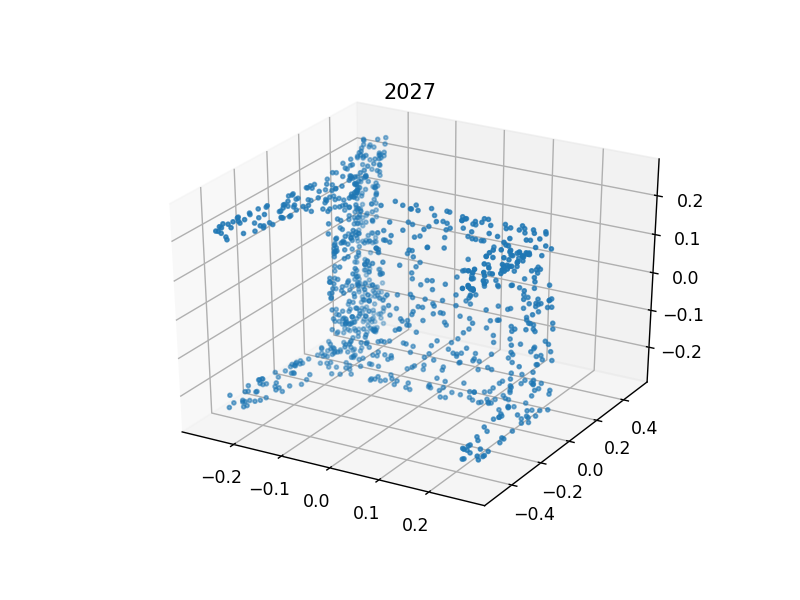

<IPython.core.display.Javascript object>


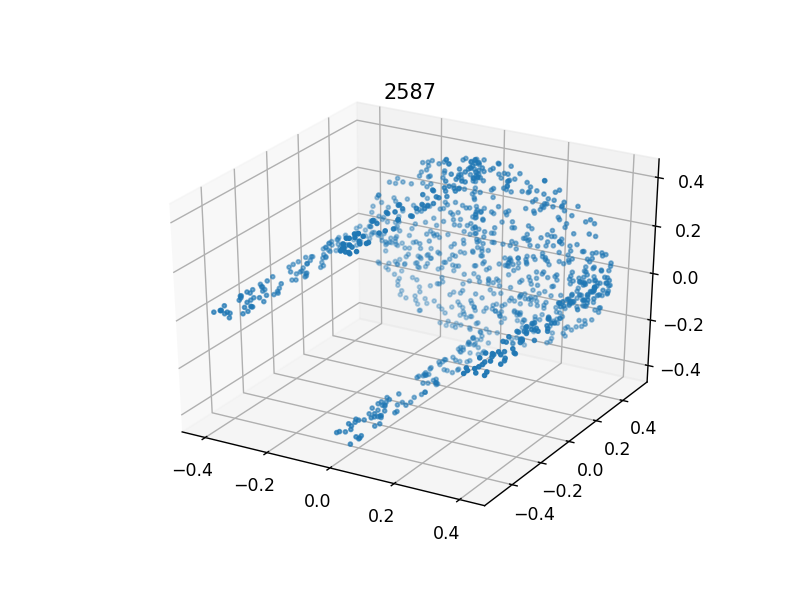

<IPython.core.display.Javascript object>


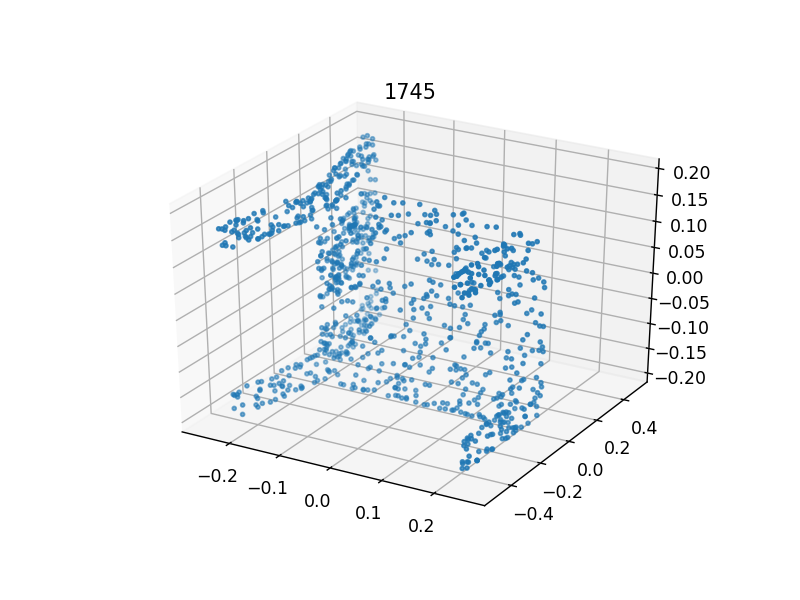

<IPython.core.display.Javascript object>


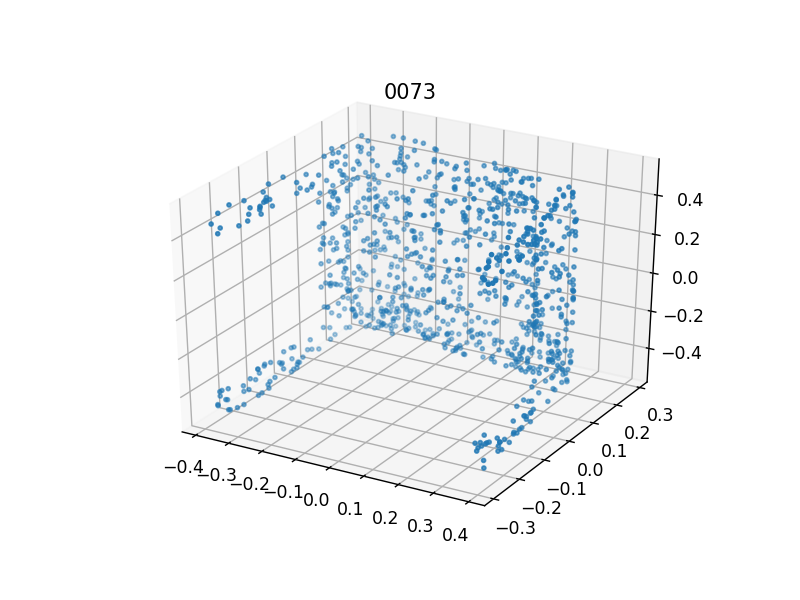

<IPython.core.display.Javascript object>


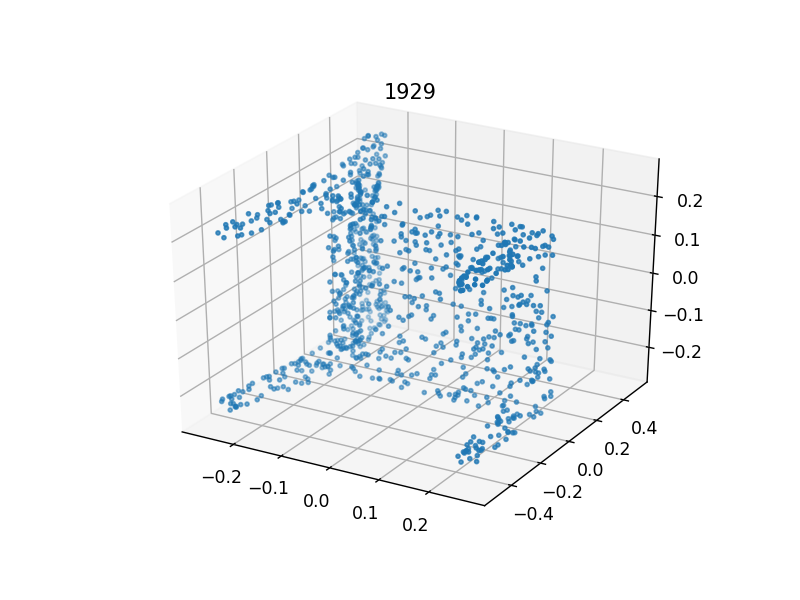

In [42]:
plot_pointclouds("../data/pix3d_processed/chair/", rotate=True)
